In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import codecs, json
import tempfile
import requests
import base64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Colabs

'Colab Notebooks'   players_22.csv   results.csv


In [ ]:
teams = pd.read_pickle("/content/drive/MyDrive/Colabs/teams.pkl")

In [ ]:
teams

,club_name,GK,FW,MD1,MD2,DF1,DF2
0,AFC Bournemouth,Mark Travers,David Robert Brooks,Ben Pearson,Jefferson Andrés Lerma Solís,Gary Cahill,Adam Smith
1,Arsenal,Bernd Leno,Pierre-Emerick Emiliano François Aubameyang,Thomas Partey,Martin Ødegaard,Kieran Tierney,Gabriel dos Santos Magalhães
2,Brighton & Hove Albion,Robert Lynch Sanchéz,Yves Bissouma,Leandro Trossard,Pascal Groß,Lewis Dunk,Joël Ivo Veltman
3,Burnley,Nick Pope,Ashley Westwood,Dwight McNeil,Josh Brownhill,James Tarkowski,Ben Mee
4,Cardiff City,Dillon Phillips,Kieffer Roberto Francisco Moore,Marlon Pack,Joe Ralls,Sean Morrison,Aden Flint
5,Chelsea,Édouard Mendy,Romelu Lukaku Menama,Luiz Frello Filho Jorge,N'Golo Kanté,César Azpilicueta Tanco,Antonio Rüdiger
6,Crystal Palace,Vicente Guaita Panadero,Wilfried Zaha,Cheikhou Kouyaté,James McArthur,Joachim Christian Andersen,Joel Ward
7,Everton,Jordan Pickford,Richarlison de Andrade,Abdoulaye Doucouré,Andros Townsend,Lucas Digne,Michael Keane
8,Fulham,Paulo Dino Gazzaniga,Aleksandar Mitrović,Harry Wilson,Nathaniel Chalobah,Kenny Joelle Tete,Oluwatosin Adarabioyo
9,Huddersfield Town,Lee Nicholls,Jonathan Hogg,Lewis O'Brien,Duane Holmes,Harry Toffolo,Matthew Pearson


In [ ]:
matches = pd.read_csv("/content/drive/MyDrive/Colabs/eplmatches20182019.csv")

In [ ]:
matches.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.0,0.0,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.0,0.0,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.0,0.0,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.0,0.0,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.0,0.0,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...


In [ ]:
matches = matches[["home_team_name","away_team_name",
         "home_team_goal_count", "away_team_goal_count"]]
matches.head()

,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count
0,Manchester United,Leicester City,2,1
1,Newcastle United,Tottenham Hotspur,1,2
2,AFC Bournemouth,Cardiff City,2,0
3,Fulham,Crystal Palace,0,2
4,Huddersfield Town,Chelsea,0,3


In [ ]:
def condition(x):
    res = x["home_team_goal_count"] - x["away_team_goal_count"]
    if res>0:
        return 0
    elif res==0:
        return 1
    else:
        return 2

In [ ]:
matches["results"] = matches.apply(condition, axis=1)

<ipython-input-63-88a73c154103>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches["results"] = matches.apply(condition, axis=1)


In [ ]:
matches.head()

,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,results
0,Manchester United,Leicester City,2,1,0
1,Newcastle United,Tottenham Hotspur,1,2,2
2,AFC Bournemouth,Cardiff City,2,0,0
3,Fulham,Crystal Palace,0,2,2
4,Huddersfield Town,Chelsea,0,3,2


In [ ]:
# get required results columns
matches = matches[["home_team_name",	"away_team_name", "results"]]
matches.head()

,home_team_name,away_team_name,results
0,Manchester United,Leicester City,0
1,Newcastle United,Tottenham Hotspur,2
2,AFC Bournemouth,Cardiff City,0
3,Fulham,Crystal Palace,2
4,Huddersfield Town,Chelsea,2


In [ ]:
players = pd.read_csv("/content/drive/MyDrive/Colabs/players_22.csv")
players.head()

<ipython-input-66-552a88c5870e>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("/content/drive/MyDrive/Colabs/players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
players.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'moveme

In [ ]:
# get required columns for players
players = players[["sofifa_id","short_name", "long_name",
         "club_name",
         "pace", "shooting", "passing", "dribbling", "defending", "physic"
         ]]

players.head()

,sofifa_id,short_name,long_name,club_name,pace,shooting,passing,dribbling,defending,physic
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,Paris Saint-Germain,85.0,92.0,91.0,95.0,34.0,65.0
1,188545,R. Lewandowski,Robert Lewandowski,FC Bayern München,78.0,92.0,79.0,86.0,44.0,82.0
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,Manchester United,87.0,94.0,80.0,88.0,34.0,75.0
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,Paris Saint-Germain,91.0,83.0,86.0,94.0,37.0,63.0
4,192985,K. De Bruyne,Kevin De Bruyne,Manchester City,76.0,86.0,93.0,88.0,64.0,78.0


In [ ]:
players.to_pickle("/content/drive/MyDrive/Colabs/playerstats.pkl")

In [ ]:
matches.to_pickle("/content/drive/MyDrive/Colabs/matches.pkl")

In [ ]:
teams

,club_name,GK,FW,MD1,MD2,DF1,DF2
0,AFC Bournemouth,Mark Travers,David Robert Brooks,Ben Pearson,Jefferson Andrés Lerma Solís,Gary Cahill,Adam Smith
1,Arsenal,Bernd Leno,Pierre-Emerick Emiliano François Aubameyang,Thomas Partey,Martin Ødegaard,Kieran Tierney,Gabriel dos Santos Magalhães
2,Brighton & Hove Albion,Robert Lynch Sanchéz,Yves Bissouma,Leandro Trossard,Pascal Groß,Lewis Dunk,Joël Ivo Veltman
3,Burnley,Nick Pope,Ashley Westwood,Dwight McNeil,Josh Brownhill,James Tarkowski,Ben Mee
4,Cardiff City,Dillon Phillips,Kieffer Roberto Francisco Moore,Marlon Pack,Joe Ralls,Sean Morrison,Aden Flint
5,Chelsea,Édouard Mendy,Romelu Lukaku Menama,Luiz Frello Filho Jorge,N'Golo Kanté,César Azpilicueta Tanco,Antonio Rüdiger
6,Crystal Palace,Vicente Guaita Panadero,Wilfried Zaha,Cheikhou Kouyaté,James McArthur,Joachim Christian Andersen,Joel Ward
7,Everton,Jordan Pickford,Richarlison de Andrade,Abdoulaye Doucouré,Andros Townsend,Lucas Digne,Michael Keane
8,Fulham,Paulo Dino Gazzaniga,Aleksandar Mitrović,Harry Wilson,Nathaniel Chalobah,Kenny Joelle Tete,Oluwatosin Adarabioyo
9,Huddersfield Town,Lee Nicholls,Jonathan Hogg,Lewis O'Brien,Duane Holmes,Harry Toffolo,Matthew Pearson


In [ ]:
players[players["long_name"]=="Adam Smith"][["pace", "shooting", "passing", "dribbling", "defending", "physic"]].values[0].tolist()

[68.0, 60.0, 70.0, 71.0, 70.0, 70.0]

In [ ]:
teams = pd.merge(teams, players[["long_name",
                         "pace", "shooting", "passing", "dribbling", "defending", "physic"
                         ]], how="left", left_on="FW", right_on="long_name")
teams.drop('FW', axis=1, inplace=True)
teams.drop('long_name', axis=1, inplace=True)
teams.head()

,club_name,GK,MD1,MD2,DF1,DF2,pace,shooting,passing,dribbling,defending,physic
0,AFC Bournemouth,Mark Travers,Ben Pearson,Jefferson Andrés Lerma Solís,Gary Cahill,Adam Smith,73.0,71.0,75.0,79.0,48.0,64.0
1,Arsenal,Bernd Leno,Thomas Partey,Martin Ødegaard,Kieran Tierney,Gabriel dos Santos Magalhães,89.0,85.0,75.0,80.0,35.0,69.0
2,Brighton & Hove Albion,Robert Lynch Sanchéz,Leandro Trossard,Pascal Groß,Lewis Dunk,Joël Ivo Veltman,70.0,68.0,75.0,78.0,77.0,75.0
3,Burnley,Nick Pope,Dwight McNeil,Josh Brownhill,James Tarkowski,Ben Mee,58.0,62.0,80.0,74.0,74.0,75.0
4,Cardiff City,Dillon Phillips,Marlon Pack,Joe Ralls,Sean Morrison,Aden Flint,77.0,71.0,56.0,67.0,47.0,82.0


In [ ]:
teams.drop('GK', axis=1, inplace=True)

In [ ]:
teams.rename(columns={
    "pace":"FWPAC",
    "shooting":"FWSHO",
    "passing":"FWPAS",
    "dribbling":"FWDRI",
    "defending":"FWDEF",
    "physic":"FWPHY"
}, inplace=True)
teams.head()

,club_name,MD1,MD2,DF1,DF2,FWPAC,FWSHO,FWPAS,FWDRI,FWDEF,FWPHY
0,AFC Bournemouth,Ben Pearson,Jefferson Andrés Lerma Solís,Gary Cahill,Adam Smith,73.0,71.0,75.0,79.0,48.0,64.0
1,Arsenal,Thomas Partey,Martin Ødegaard,Kieran Tierney,Gabriel dos Santos Magalhães,89.0,85.0,75.0,80.0,35.0,69.0
2,Brighton & Hove Albion,Leandro Trossard,Pascal Groß,Lewis Dunk,Joël Ivo Veltman,70.0,68.0,75.0,78.0,77.0,75.0
3,Burnley,Dwight McNeil,Josh Brownhill,James Tarkowski,Ben Mee,58.0,62.0,80.0,74.0,74.0,75.0
4,Cardiff City,Marlon Pack,Joe Ralls,Sean Morrison,Aden Flint,77.0,71.0,56.0,67.0,47.0,82.0


In [ ]:
teams = pd.merge(teams, players[["long_name",
                         "pace", "shooting", "passing", "dribbling", "defending", "physic"
                         ]], how="left", left_on="MD1", right_on="long_name")
teams.drop('MD1', axis=1, inplace=True)
teams.drop('long_name', axis=1, inplace=True)
teams.rename(columns={
    "pace":"MD1PAC",
    "shooting":"MD1SHO",
    "passing":"MD1PAS",
    "dribbling":"MD1DRI",
    "defending":"MD1DEF",
    "physic":"MD1PHY"
}, inplace=True)
teams.head()

,club_name,MD2,DF1,DF2,FWPAC,FWSHO,FWPAS,FWDRI,FWDEF,FWPHY,MD1PAC,MD1SHO,MD1PAS,MD1DRI,MD1DEF,MD1PHY
0,AFC Bournemouth,Jefferson Andrés Lerma Solís,Gary Cahill,Adam Smith,73.0,71.0,75.0,79.0,48.0,64.0,70.0,49.0,63.0,70.0,72.0,84.0
1,Arsenal,Martin Ødegaard,Kieran Tierney,Gabriel dos Santos Magalhães,89.0,85.0,75.0,80.0,35.0,69.0,69.0,71.0,82.0,81.0,80.0,84.0
2,Brighton & Hove Albion,Pascal Groß,Lewis Dunk,Joël Ivo Veltman,70.0,68.0,75.0,78.0,77.0,75.0,82.0,76.0,74.0,80.0,30.0,61.0
3,Burnley,Josh Brownhill,James Tarkowski,Ben Mee,58.0,62.0,80.0,74.0,74.0,75.0,72.0,68.0,77.0,80.0,53.0,67.0
4,Cardiff City,Joe Ralls,Sean Morrison,Aden Flint,77.0,71.0,56.0,67.0,47.0,82.0,51.0,60.0,71.0,69.0,67.0,77.0


In [ ]:
teams = pd.merge(teams, players[["long_name",
                         "pace", "shooting", "passing", "dribbling", "defending", "physic"
                         ]], how="left", left_on="MD2", right_on="long_name")
teams.drop('MD2', axis=1, inplace=True)
teams.drop('long_name', axis=1, inplace=True)
teams.rename(columns={
    "pace":"MD2PAC",
    "shooting":"MD2SHO",
    "passing":"MD2PAS",
    "dribbling":"MD2DRI",
    "defending":"MD2DEF",
    "physic":"MD2PHY"
}, inplace=True)
teams.head()

,club_name,DF1,DF2,FWPAC,FWSHO,FWPAS,FWDRI,FWDEF,FWPHY,MD1PAC,...,MD1PAS,MD1DRI,MD1DEF,MD1PHY,MD2PAC,MD2SHO,MD2PAS,MD2DRI,MD2DEF,MD2PHY
0,AFC Bournemouth,Gary Cahill,Adam Smith,73.0,71.0,75.0,79.0,48.0,64.0,70.0,...,63.0,70.0,72.0,84.0,71.0,64.0,70.0,72.0,72.0,81.0
1,Arsenal,Kieran Tierney,Gabriel dos Santos Magalhães,89.0,85.0,75.0,80.0,35.0,69.0,69.0,...,82.0,81.0,80.0,84.0,77.0,74.0,83.0,84.0,58.0,62.0
2,Brighton & Hove Albion,Lewis Dunk,Joël Ivo Veltman,70.0,68.0,75.0,78.0,77.0,75.0,82.0,...,74.0,80.0,30.0,61.0,50.0,74.0,80.0,75.0,58.0,71.0
3,Burnley,James Tarkowski,Ben Mee,58.0,62.0,80.0,74.0,74.0,75.0,72.0,...,77.0,80.0,53.0,67.0,69.0,67.0,72.0,74.0,74.0,76.0
4,Cardiff City,Sean Morrison,Aden Flint,77.0,71.0,56.0,67.0,47.0,82.0,51.0,...,71.0,69.0,67.0,77.0,64.0,69.0,71.0,70.0,67.0,67.0


In [ ]:
teams = pd.merge(teams, players[["long_name",
                         "pace", "shooting", "passing", "dribbling", "defending", "physic"
                         ]], how="left", left_on="DF1", right_on="long_name")
teams.drop('DF1', axis=1, inplace=True)
teams.drop('long_name', axis=1, inplace=True)
teams.rename(columns={
    "pace":"DF1PAC",
    "shooting":"DF1SHO",
    "passing":"DF1PAS",
    "dribbling":"DF1DRI",
    "defending":"DF1DEF",
    "physic":"DF1PHY"
}, inplace=True)
teams.head()

,club_name,DF2,FWPAC,FWSHO,FWPAS,FWDRI,FWDEF,FWPHY,MD1PAC,MD1SHO,...,MD2PAS,MD2DRI,MD2DEF,MD2PHY,DF1PAC,DF1SHO,DF1PAS,DF1DRI,DF1DEF,DF1PHY
0,AFC Bournemouth,Adam Smith,73.0,71.0,75.0,79.0,48.0,64.0,70.0,49.0,...,70.0,72.0,72.0,81.0,32.0,58.0,51.0,55.0,76.0,74.0
1,Arsenal,Gabriel dos Santos Magalhães,89.0,85.0,75.0,80.0,35.0,69.0,69.0,71.0,...,83.0,84.0,58.0,62.0,84.0,60.0,75.0,77.0,75.0,79.0
2,Brighton & Hove Albion,Joël Ivo Veltman,70.0,68.0,75.0,78.0,77.0,75.0,82.0,76.0,...,80.0,75.0,58.0,71.0,46.0,51.0,62.0,64.0,79.0,78.0
3,Burnley,Ben Mee,58.0,62.0,80.0,74.0,74.0,75.0,72.0,68.0,...,72.0,74.0,74.0,76.0,57.0,45.0,67.0,65.0,82.0,81.0
4,Cardiff City,Aden Flint,77.0,71.0,56.0,67.0,47.0,82.0,51.0,60.0,...,71.0,70.0,67.0,67.0,45.0,29.0,41.0,48.0,74.0,79.0


In [ ]:
teams = pd.merge(teams, players[["long_name",
                         "pace", "shooting", "passing", "dribbling", "defending", "physic"
                         ]], how="left", left_on="DF2", right_on="long_name")
teams.drop('DF2', axis=1, inplace=True)
teams.drop('long_name', axis=1, inplace=True)
teams.rename(columns={
    "pace":"DF2PAC",
    "shooting":"DF2SHO",
    "passing":"DF2PAS",
    "dribbling":"DF2DRI",
    "defending":"DF2DEF",
    "physic":"DF2PHY"
}, inplace=True)
teams.head()

,club_name,FWPAC,FWSHO,FWPAS,FWDRI,FWDEF,FWPHY,MD1PAC,MD1SHO,MD1PAS,...,DF1PAS,DF1DRI,DF1DEF,DF1PHY,DF2PAC,DF2SHO,DF2PAS,DF2DRI,DF2DEF,DF2PHY
0,AFC Bournemouth,73.0,71.0,75.0,79.0,48.0,64.0,70.0,49.0,63.0,...,51.0,55.0,76.0,74.0,68.0,60.0,70.0,71.0,70.0,70.0
1,Arsenal,89.0,85.0,75.0,80.0,35.0,69.0,69.0,71.0,82.0,...,75.0,77.0,75.0,79.0,68.0,36.0,60.0,58.0,80.0,80.0
2,Brighton & Hove Albion,70.0,68.0,75.0,78.0,77.0,75.0,82.0,76.0,74.0,...,62.0,64.0,79.0,78.0,64.0,49.0,66.0,69.0,79.0,76.0
3,Burnley,58.0,62.0,80.0,74.0,74.0,75.0,72.0,68.0,77.0,...,67.0,65.0,82.0,81.0,62.0,42.0,58.0,63.0,81.0,78.0
4,Cardiff City,77.0,71.0,56.0,67.0,47.0,82.0,51.0,60.0,71.0,...,41.0,48.0,74.0,79.0,43.0,47.0,40.0,41.0,71.0,81.0


In [ ]:
hometeam = teams

In [ ]:
hometeam.head()

,club_name,FWPAC,FWSHO,FWPAS,FWDRI,FWDEF,FWPHY,MD1PAC,MD1SHO,MD1PAS,...,DF1PAS,DF1DRI,DF1DEF,DF1PHY,DF2PAC,DF2SHO,DF2PAS,DF2DRI,DF2DEF,DF2PHY
0,AFC Bournemouth,73.0,71.0,75.0,79.0,48.0,64.0,70.0,49.0,63.0,...,51.0,55.0,76.0,74.0,68.0,60.0,70.0,71.0,70.0,70.0
1,Arsenal,89.0,85.0,75.0,80.0,35.0,69.0,69.0,71.0,82.0,...,75.0,77.0,75.0,79.0,68.0,36.0,60.0,58.0,80.0,80.0
2,Brighton & Hove Albion,70.0,68.0,75.0,78.0,77.0,75.0,82.0,76.0,74.0,...,62.0,64.0,79.0,78.0,64.0,49.0,66.0,69.0,79.0,76.0
3,Burnley,58.0,62.0,80.0,74.0,74.0,75.0,72.0,68.0,77.0,...,67.0,65.0,82.0,81.0,62.0,42.0,58.0,63.0,81.0,78.0
4,Cardiff City,77.0,71.0,56.0,67.0,47.0,82.0,51.0,60.0,71.0,...,41.0,48.0,74.0,79.0,43.0,47.0,40.0,41.0,71.0,81.0


In [ ]:
hometeam = hometeam.add_prefix("H_")
hometeam.rename(columns={"H_club_name":"club_name"}, inplace=True)

In [ ]:
hometeam.head()

,club_name,H_FWPAC,H_FWSHO,H_FWPAS,H_FWDRI,H_FWDEF,H_FWPHY,H_MD1PAC,H_MD1SHO,H_MD1PAS,...,H_DF1PAS,H_DF1DRI,H_DF1DEF,H_DF1PHY,H_DF2PAC,H_DF2SHO,H_DF2PAS,H_DF2DRI,H_DF2DEF,H_DF2PHY
0,AFC Bournemouth,73.0,71.0,75.0,79.0,48.0,64.0,70.0,49.0,63.0,...,51.0,55.0,76.0,74.0,68.0,60.0,70.0,71.0,70.0,70.0
1,Arsenal,89.0,85.0,75.0,80.0,35.0,69.0,69.0,71.0,82.0,...,75.0,77.0,75.0,79.0,68.0,36.0,60.0,58.0,80.0,80.0
2,Brighton & Hove Albion,70.0,68.0,75.0,78.0,77.0,75.0,82.0,76.0,74.0,...,62.0,64.0,79.0,78.0,64.0,49.0,66.0,69.0,79.0,76.0
3,Burnley,58.0,62.0,80.0,74.0,74.0,75.0,72.0,68.0,77.0,...,67.0,65.0,82.0,81.0,62.0,42.0,58.0,63.0,81.0,78.0
4,Cardiff City,77.0,71.0,56.0,67.0,47.0,82.0,51.0,60.0,71.0,...,41.0,48.0,74.0,79.0,43.0,47.0,40.0,41.0,71.0,81.0


In [ ]:
hometeam.to_pickle("/content/drive/MyDrive/Colabs/hometeams.pkl")

In [ ]:
awayteam = teams
awayteam.head()

,club_name,FWPAC,FWSHO,FWPAS,FWDRI,FWDEF,FWPHY,MD1PAC,MD1SHO,MD1PAS,...,DF1PAS,DF1DRI,DF1DEF,DF1PHY,DF2PAC,DF2SHO,DF2PAS,DF2DRI,DF2DEF,DF2PHY
0,AFC Bournemouth,73.0,71.0,75.0,79.0,48.0,64.0,70.0,49.0,63.0,...,51.0,55.0,76.0,74.0,68.0,60.0,70.0,71.0,70.0,70.0
1,Arsenal,89.0,85.0,75.0,80.0,35.0,69.0,69.0,71.0,82.0,...,75.0,77.0,75.0,79.0,68.0,36.0,60.0,58.0,80.0,80.0
2,Brighton & Hove Albion,70.0,68.0,75.0,78.0,77.0,75.0,82.0,76.0,74.0,...,62.0,64.0,79.0,78.0,64.0,49.0,66.0,69.0,79.0,76.0
3,Burnley,58.0,62.0,80.0,74.0,74.0,75.0,72.0,68.0,77.0,...,67.0,65.0,82.0,81.0,62.0,42.0,58.0,63.0,81.0,78.0
4,Cardiff City,77.0,71.0,56.0,67.0,47.0,82.0,51.0,60.0,71.0,...,41.0,48.0,74.0,79.0,43.0,47.0,40.0,41.0,71.0,81.0


In [ ]:
awayteam = awayteam.add_prefix("A_")
awayteam.rename(columns={"A_club_name":"club_name"}, inplace=True)
awayteam.head()

,club_name,A_FWPAC,A_FWSHO,A_FWPAS,A_FWDRI,A_FWDEF,A_FWPHY,A_MD1PAC,A_MD1SHO,A_MD1PAS,...,A_DF1PAS,A_DF1DRI,A_DF1DEF,A_DF1PHY,A_DF2PAC,A_DF2SHO,A_DF2PAS,A_DF2DRI,A_DF2DEF,A_DF2PHY
0,AFC Bournemouth,73.0,71.0,75.0,79.0,48.0,64.0,70.0,49.0,63.0,...,51.0,55.0,76.0,74.0,68.0,60.0,70.0,71.0,70.0,70.0
1,Arsenal,89.0,85.0,75.0,80.0,35.0,69.0,69.0,71.0,82.0,...,75.0,77.0,75.0,79.0,68.0,36.0,60.0,58.0,80.0,80.0
2,Brighton & Hove Albion,70.0,68.0,75.0,78.0,77.0,75.0,82.0,76.0,74.0,...,62.0,64.0,79.0,78.0,64.0,49.0,66.0,69.0,79.0,76.0
3,Burnley,58.0,62.0,80.0,74.0,74.0,75.0,72.0,68.0,77.0,...,67.0,65.0,82.0,81.0,62.0,42.0,58.0,63.0,81.0,78.0
4,Cardiff City,77.0,71.0,56.0,67.0,47.0,82.0,51.0,60.0,71.0,...,41.0,48.0,74.0,79.0,43.0,47.0,40.0,41.0,71.0,81.0


In [ ]:
awayteam.to_pickle("/content/drive/MyDrive/Colabs/awayteams.pkl")

In [ ]:
hometeam.head()

,club_name,H_FWPAC,H_FWSHO,H_FWPAS,H_FWDRI,H_FWDEF,H_FWPHY,H_MD1PAC,H_MD1SHO,H_MD1PAS,...,H_DF1PAS,H_DF1DRI,H_DF1DEF,H_DF1PHY,H_DF2PAC,H_DF2SHO,H_DF2PAS,H_DF2DRI,H_DF2DEF,H_DF2PHY
0,AFC Bournemouth,73.0,71.0,75.0,79.0,48.0,64.0,70.0,49.0,63.0,...,51.0,55.0,76.0,74.0,68.0,60.0,70.0,71.0,70.0,70.0
1,Arsenal,89.0,85.0,75.0,80.0,35.0,69.0,69.0,71.0,82.0,...,75.0,77.0,75.0,79.0,68.0,36.0,60.0,58.0,80.0,80.0
2,Brighton & Hove Albion,70.0,68.0,75.0,78.0,77.0,75.0,82.0,76.0,74.0,...,62.0,64.0,79.0,78.0,64.0,49.0,66.0,69.0,79.0,76.0
3,Burnley,58.0,62.0,80.0,74.0,74.0,75.0,72.0,68.0,77.0,...,67.0,65.0,82.0,81.0,62.0,42.0,58.0,63.0,81.0,78.0
4,Cardiff City,77.0,71.0,56.0,67.0,47.0,82.0,51.0,60.0,71.0,...,41.0,48.0,74.0,79.0,43.0,47.0,40.0,41.0,71.0,81.0


In [ ]:
awayteam.head()

,club_name,A_FWPAC,A_FWSHO,A_FWPAS,A_FWDRI,A_FWDEF,A_FWPHY,A_MD1PAC,A_MD1SHO,A_MD1PAS,...,A_DF1PAS,A_DF1DRI,A_DF1DEF,A_DF1PHY,A_DF2PAC,A_DF2SHO,A_DF2PAS,A_DF2DRI,A_DF2DEF,A_DF2PHY
0,AFC Bournemouth,73.0,71.0,75.0,79.0,48.0,64.0,70.0,49.0,63.0,...,51.0,55.0,76.0,74.0,68.0,60.0,70.0,71.0,70.0,70.0
1,Arsenal,89.0,85.0,75.0,80.0,35.0,69.0,69.0,71.0,82.0,...,75.0,77.0,75.0,79.0,68.0,36.0,60.0,58.0,80.0,80.0
2,Brighton & Hove Albion,70.0,68.0,75.0,78.0,77.0,75.0,82.0,76.0,74.0,...,62.0,64.0,79.0,78.0,64.0,49.0,66.0,69.0,79.0,76.0
3,Burnley,58.0,62.0,80.0,74.0,74.0,75.0,72.0,68.0,77.0,...,67.0,65.0,82.0,81.0,62.0,42.0,58.0,63.0,81.0,78.0
4,Cardiff City,77.0,71.0,56.0,67.0,47.0,82.0,51.0,60.0,71.0,...,41.0,48.0,74.0,79.0,43.0,47.0,40.0,41.0,71.0,81.0


In [ ]:
matches

,home_team_name,away_team_name,results
0,Manchester United,Leicester City,0
1,Newcastle United,Tottenham Hotspur,2
2,AFC Bournemouth,Cardiff City,0
3,Fulham,Crystal Palace,2
4,Huddersfield Town,Chelsea,2
...,...,...,...
375,Liverpool,Wolverhampton Wanderers,0
376,Manchester United,Cardiff City,2
377,Southampton,Huddersfield Town,1
378,Tottenham Hotspur,Everton,1


In [ ]:
final = pd.merge(matches, hometeam, how="left", left_on="home_team_name", right_on="club_name")
#final.drop('home_team_name', axis=1, inplace=True)
final.drop('club_name', axis=1, inplace=True)
final.head()

,home_team_name,away_team_name,results,H_FWPAC,H_FWSHO,H_FWPAS,H_FWDRI,H_FWDEF,H_FWPHY,H_MD1PAC,...,H_DF1PAS,H_DF1DRI,H_DF1DEF,H_DF1PHY,H_DF2PAC,H_DF2SHO,H_DF2PAS,H_DF2DRI,H_DF2DEF,H_DF2PHY
0,Manchester United,Leicester City,0,87.0,94.0,80.0,88.0,34.0,75.0,75.0,...,64.0,65.0,87.0,82.0,50.0,55.0,69.0,70.0,85.0,87.0
1,Newcastle United,Tottenham Hotspur,2,86.0,72.0,74.0,79.0,53.0,63.0,58.0,...,51.0,56.0,77.0,79.0,58.0,67.0,70.0,68.0,77.0,75.0
2,AFC Bournemouth,Cardiff City,0,73.0,71.0,75.0,79.0,48.0,64.0,70.0,...,51.0,55.0,76.0,74.0,68.0,60.0,70.0,71.0,70.0,70.0
3,Fulham,Crystal Palace,2,63.0,76.0,56.0,70.0,27.0,84.0,77.0,...,65.0,68.0,74.0,74.0,67.0,31.0,55.0,57.0,75.0,75.0
4,Huddersfield Town,Chelsea,2,66.0,53.0,60.0,65.0,69.0,79.0,69.0,...,62.0,65.0,65.0,71.0,60.0,43.0,50.0,55.0,70.0,76.0


In [ ]:
final = pd.merge(final, awayteam, how="left", left_on="away_team_name", right_on="club_name")
final.drop('club_name', axis=1, inplace=True)
final.head()

,home_team_name,away_team_name,results,H_FWPAC,H_FWSHO,H_FWPAS,H_FWDRI,H_FWDEF,H_FWPHY,H_MD1PAC,...,A_DF1PAS,A_DF1DRI,A_DF1DEF,A_DF1PHY,A_DF2PAC,A_DF2SHO,A_DF2PAS,A_DF2DRI,A_DF2DEF,A_DF2PHY
0,Manchester United,Leicester City,0,87.0,94.0,80.0,88.0,34.0,75.0,75.0,...,78.0,82.0,80.0,75.0,76.0,46.0,60.0,67.0,80.0,80.0
1,Newcastle United,Tottenham Hotspur,2,86.0,72.0,74.0,79.0,53.0,63.0,58.0,...,75.0,78.0,78.0,70.0,53.0,64.0,69.0,64.0,79.0,83.0
2,AFC Bournemouth,Cardiff City,0,73.0,71.0,75.0,79.0,48.0,64.0,70.0,...,41.0,48.0,74.0,79.0,43.0,47.0,40.0,41.0,71.0,81.0
3,Fulham,Crystal Palace,2,63.0,76.0,56.0,70.0,27.0,84.0,77.0,...,63.0,59.0,77.0,78.0,54.0,52.0,67.0,66.0,77.0,71.0
4,Huddersfield Town,Chelsea,2,66.0,53.0,60.0,65.0,69.0,79.0,69.0,...,76.0,72.0,84.0,76.0,75.0,43.0,68.0,64.0,84.0,84.0


In [ ]:
final.to_pickle("/content/drive/MyDrive/Colabs/finalmerge.pkl")

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
final['results']= label_encoder.fit_transform(final['results'])

In [ ]:
final.head()

,home_team_name,away_team_name,results,H_FWPAC,H_FWSHO,H_FWPAS,H_FWDRI,H_FWDEF,H_FWPHY,H_MD1PAC,...,A_DF1PAS,A_DF1DRI,A_DF1DEF,A_DF1PHY,A_DF2PAC,A_DF2SHO,A_DF2PAS,A_DF2DRI,A_DF2DEF,A_DF2PHY
0,Manchester United,Leicester City,0,87.0,94.0,80.0,88.0,34.0,75.0,75.0,...,78.0,82.0,80.0,75.0,76.0,46.0,60.0,67.0,80.0,80.0
1,Newcastle United,Tottenham Hotspur,2,86.0,72.0,74.0,79.0,53.0,63.0,58.0,...,75.0,78.0,78.0,70.0,53.0,64.0,69.0,64.0,79.0,83.0
2,AFC Bournemouth,Cardiff City,0,73.0,71.0,75.0,79.0,48.0,64.0,70.0,...,41.0,48.0,74.0,79.0,43.0,47.0,40.0,41.0,71.0,81.0
3,Fulham,Crystal Palace,2,63.0,76.0,56.0,70.0,27.0,84.0,77.0,...,63.0,59.0,77.0,78.0,54.0,52.0,67.0,66.0,77.0,71.0
4,Huddersfield Town,Chelsea,2,66.0,53.0,60.0,65.0,69.0,79.0,69.0,...,76.0,72.0,84.0,76.0,75.0,43.0,68.0,64.0,84.0,84.0


In [ ]:
final.results.unique()

array([0, 2, 1])

In [ ]:
final.isnull().values.any()

False

In [ ]:
label = final["results"]
features = final.iloc[:,3:]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=np.ravel(label)
X = features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

print("The shape of X_train is " + str(X_train.shape))
print("The size of y_train is " + str(y_train.shape))
print("The size of X_test set is " + str(X_test.shape))
print("The size of y_test is " + str(y_test.shape))

The shape of X_train is (254, 60)
The size of y_train is (254,)
The size of X_test set is (126, 60)
The size of y_test is (126,)


In [ ]:
#one hot-encoding y_train and y_test
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print("The size of y_train is " + str(y_train.shape))
print("The size of y_test is " + str(y_test.shape))

print(y_train[0])

The size of y_train is (254, 3)
The size of y_test is (126, 3)
[1. 0. 0.]


In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(180, input_dim=60, activation='relu'),
      tf.keras.layers.Dense(10, input_dim=180, activation='relu'),
      tf.keras.layers.Dense(3,activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180)               10980     
                                                                 
 dense_1 (Dense)             (None, 10)                1810      
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 12823 (50.09 KB)
Trainable params: 12823 (50.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=65)

Epoch 1/65
8/8 [==============================] - 2s 7ms/step - loss: 2.6026 - accuracy: 0.3386
Epoch 2/65
8/8 [==============================] - 0s 14ms/step - loss: 1.0978 - accuracy: 0.3425
Epoch 3/65
8/8 [==============================] - 0s 10ms/step - loss: 1.0964 - accuracy: 0.3819
Epoch 4/65
8/8 [==============================] - 0s 11ms/step - loss: 1.0949 - accuracy: 0.4567
Epoch 5/65
8/8 [==============================] - 0s 4ms/step - loss: 1.0936 - accuracy: 0.4567
Epoch 6/65
8/8 [==============================] - 0s 3ms/step - loss: 1.0919 - accuracy: 0.4567
Epoch 7/65
8/8 [==============================] - 0s 3ms/step - loss: 1.0904 - accuracy: 0.4567
Epoch 8/65
8/8 [==============================] - 0s 3ms/step - loss: 1.0889 - accuracy: 0.4567
Epoch 9/65
8/8 [==============================] - 0s 3ms/step - loss: 1.0875 - accuracy: 0.4567
Epoch 10/65
8/8 [==============================] - 0s 3ms/step - loss: 1.0861 - accuracy: 0.4567
Epoch 11/65
8/8 [===================

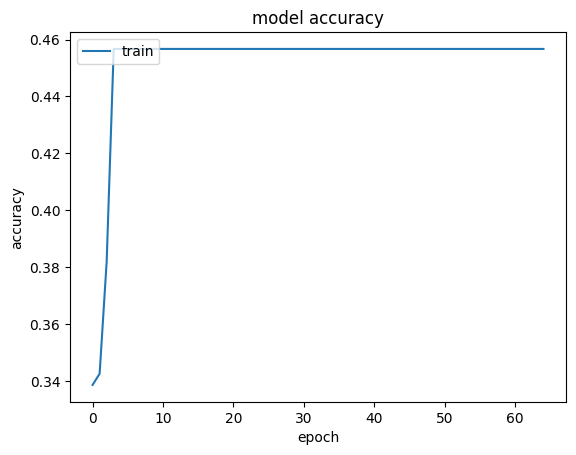

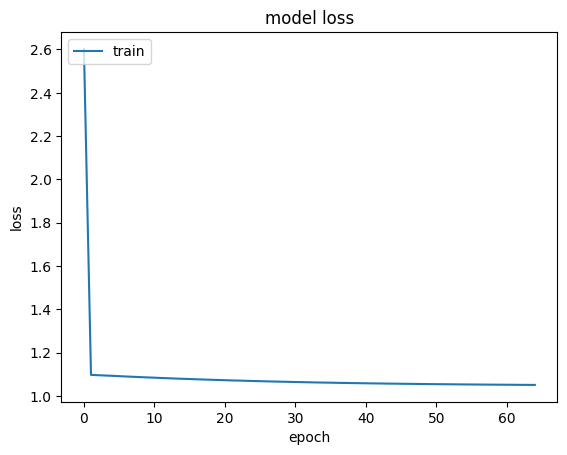

In [ ]:
#accuracy history
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#loss history
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#eval
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

4/4 [==============================] - 0s 5ms/step - loss: 1.0228 - accuracy: 0.5159
Test Score: 1.0227575302124023
Test Accuracy: 0.5158730149269104


In [ ]:
Xnew = np.array([[90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,
                80,80,80,80,80,80, 80,80,80,80,80,80, 80,80,80,80,80,80, 80,80,80,80,80,80, 80,80,80,80,80,80
                  ]])
print('the shape of our input data is ', Xnew.shape)

 # make a prediction
ynew = np.argmax(model.predict(Xnew), axis=-1)
# show the inputs and predicted outputs
print("X = %s " % Xnew)
print("Prediction = %s" % ynew[0])

if ynew[0] == 2:
  print("Away team is going to win")
elif ynew[0] == 0:
  print("Home team is going to win")
else:
  print("It is going to be a draw")

the shape of our input data is  (1, 60)
1/1 [==============================] - 0s 94ms/step
X = [[90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90
  90 90 90 90 90 90 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
  80 80 80 80 80 80 80 80 80 80 80 80]] 
Prediction = 0
Home team is going to win


In [ ]:

MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


export_path = /tmp/1
total 116
drwxr-xr-x 2 root root  4096 Nov 18 20:43 assets
-rw-r--r-- 1 root root    57 Nov 18 20:43 fingerprint.pb
-rw-r--r-- 1 root root  9023 Nov 18 20:43 keras_metadata.pb
-rw-r--r-- 1 root root 90122 Nov 18 20:43 saved_model.pb
drwxr-xr-x 2 root root  4096 Nov 18 20:43 variables


In [ ]:
!ls -l {export_path}

total 116
drwxr-xr-x 2 root root  4096 Nov 18 20:43 assets
-rw-r--r-- 1 root root    57 Nov 18 20:43 fingerprint.pb
-rw-r--r-- 1 root root  9023 Nov 18 20:43 keras_metadata.pb
-rw-r--r-- 1 root root 90122 Nov 18 20:43 saved_model.pb
drwxr-xr-x 2 root root  4096 Nov 18 20:43 variables


In [ ]:
model.save("/content/drive/MyDrive/Colabs/saved_soccermodel.pb", save_format="tf")

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
type(model)

keras.src.engine.sequential.Sequential

In [ ]:
!pip install onnx

In [ ]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.7/454.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
import tf2onnx
import onnx

In [ ]:
model.name

'sequential'

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colabs/saved_soccermodel.pb')

In [ ]:
tf2onnx.convert.from_keras(model, output_path='/content/drive/MyDrive/Colabs/soccermodel.onnx')

(ir_version: 8
 producer_name: "tf2onnx"
 producer_version: "1.15.1 37820d"
 graph {
   node {
     input: "dense_input"
     input: "sequential/dense/MatMul/ReadVariableOp:0"
     output: "sequential/dense/MatMul:0"
     name: "sequential/dense/MatMul"
     op_type: "MatMul"
   }
   node {
     input: "sequential/dense/MatMul:0"
     input: "sequential/dense/BiasAdd/ReadVariableOp:0"
     output: "sequential/dense/BiasAdd:0"
     name: "sequential/dense/BiasAdd"
     op_type: "Add"
   }
   node {
     input: "sequential/dense/BiasAdd:0"
     output: "sequential/dense/Relu:0"
     name: "sequential/dense/Relu"
     op_type: "Relu"
   }
   node {
     input: "sequential/dense/Relu:0"
     input: "sequential/dense_1/MatMul/ReadVariableOp:0"
     output: "sequential/dense_1/MatMul:0"
     name: "sequential/dense_1/MatMul"
     op_type: "MatMul"
   }
   node {
     input: "sequential/dense_1/MatMul:0"
     input: "sequential/dense_1/BiasAdd/ReadVariableOp:0"
     output: "sequential/dense_